<a href="https://colab.research.google.com/github/keepGuessingGrl/2024_Geoinformatique_I/blob/main/surface_agricoles_utiles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pooch

Téléchargez l’archive ZIP avec Pooch et décompressez l’archive. L’URL des données est: https://files.swisscarto.ch/geoinf1/vd_dgav_surfaces_agricoles.zip.

In [2]:
import pooch

In [3]:
data_files = pooch.retrieve(
    url = 'https://files.swisscarto.ch/geoinf1/vd_dgav_surfaces_agricoles.zip',
    known_hash = None,
    processor = pooch.Unzip()
)

SHA256 hash of downloaded file: 0d866067c647f235d92499e669b8dfb4dfea18da3cfd99434a7e6176a9fba81f
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
Unzipping contents of '/root/.cache/pooch/26d2db3ccf4efc592af4b57a09f55371-vd_dgav_surfaces_agricoles.zip' to '/root/.cache/pooch/26d2db3ccf4efc592af4b57a09f55371-vd_dgav_surfaces_agricoles.zip.unzip'


Ajoutez le fichier Geopackage avec le périmètre d’évaluation dans Google Colab.

Avec GeoPandas, lisez le fichier Geopackage avec les surfaces agricoles. C’est la couche agr_dgav_sau qui nous intéresse (SAU pour surface agricole utile).



In [4]:
!pip install geopandas

In [5]:
import geopandas as gpd


/usr/local/lib/python3.10/dist-packages/pyogrio/geopandas.py:265: UserWarning: More than one layer found in 'vd_dgav_surfaces_agricoles.gpkg': 'agr_dgav_sau' (default), 'agr_dgav_prom_biodiv_reseau', 'agr_dgav_surface_estivage'. Specify layer parameter to avoid this warning.
  result = read_func(


Available layers:            ident                                           geometry
0      vd_406924  MULTIPOLYGON (((2499165.727 1130275.64, 249915...
1       vd_49133  MULTIPOLYGON (((2499231.401 1130487.699, 24990...
2      vd_209293  MULTIPOLYGON (((2499247.82 1130502.629, 249932...
3      vd_209482  MULTIPOLYGON (((2499336.069 1130608.47, 249937...
4      vd_450638  MULTIPOLYGON (((2499262.497 1131049.141, 24992...
...          ...                                                ...
92417  vd_490543  MULTIPOLYGON (((2584108.746 1148969.152, 25841...
92418  vd_396452  MULTIPOLYGON (((2584149.939 1149192.645, 25841...
92419  vd_136034  MULTIPOLYGON (((2583982.654 1149372.079, 25840...
92420  vd_205255  MULTIPOLYGON (((2584282.55 1149253.681, 258428...
92421  vd_444402  MULTIPOLYGON (((2584317.504 1149216.103, 25843...

[92422 rows x 2 columns]
       ident                                           geometry
0  vd_406924  MULTIPOLYGON (((2499165.727 1130275.64, 249915...
1   vd_49133

<Axes: >

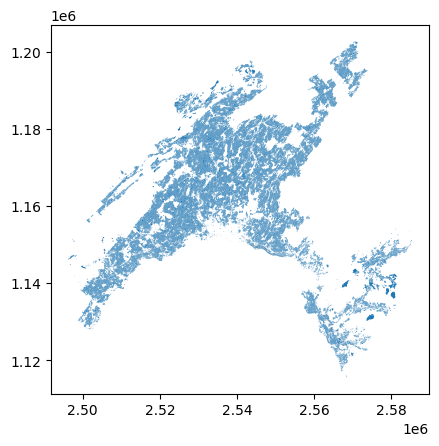

In [9]:
# Path to your GeoPackage file (replace with the actual path or file name)
file_path = "vd_dgav_surfaces_agricoles.gpkg"

# List all layers in the GeoPackage to confirm the layer name
layers = gpd.read_file(file_path, layer=None)
print("Available layers:", layers)

# Read the specific layer 'agr_dgav_sau'
gdf_sau = gpd.read_file(file_path, layer="agr_dgav_sau")

# Inspect the first few rows of the dataset
print(gdf_sau.head())

# Display information about the GeoDataFrame (columns, CRS, etc.)
print(gdf_sau.info())

# Optional: Plot the data if you want a quick visualization
gdf_sau.plot()


Lisez la couche avec votre périmètre d’évaluation (votre rectangle de 20 km). Vous avez créé cette couche dans une étape précédente.

Couches disponibles dans le GeoPackage : [['ze_5293' 'MultiPolygon']
 ['perimetre-ze-joint' 'Polygon']
 ['perimetre_evaluation' 'Polygon']]
                                            geometry
0  POLYGON ((2519787 1142764, 2519787 1162764, 25...
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  1 non-null      geometry
dtypes: geometry(1)
memory usage: 136.0 bytes
None


<Axes: >

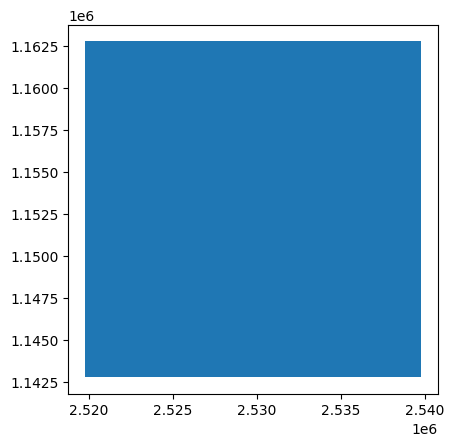

In [21]:
# Importation des bibliothèques nécessaires
import geopandas as gpd

# Définir le chemin vers votre fichier GeoPackage
file_path = "geoinf-proj-ze-5293.gpkg"

# Liste des couches disponibles dans le GeoPackage
from pyogrio import list_layers  # Required to list layers
layers = list_layers(file_path)
print("Couches disponibles dans le GeoPackage :", layers)

# Spécifiez le nom exact de la couche contenant le périmètre d'évaluation
evaluation_layer = "perimetre_evaluation"  # Replace with the exact layer name from the output above

# Charger la couche spécifique
gdf_eval = gpd.read_file(file_path, layer=evaluation_layer)

# Afficher un aperçu des données
print(gdf_eval.head())
print(gdf_eval.info())

# Visualiser la couche pour vérifier
gdf_eval.plot()
